## Exercise 1: Direct PCA method

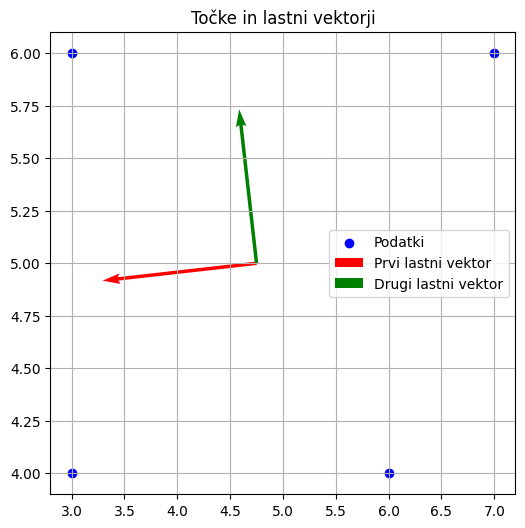

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import a6_utils
import cv2

def compute_mean(data):
    return np.mean(data, axis=0)

def center_data(data, mean):
    return data - mean

def compute_covariance_matrix(data):
    return np.cov(data, rowvar=False)

def perform_svd(cov_matrix):
    U, S, VT = np.linalg.svd(cov_matrix)
    return U, S, VT

def project_to_pca_space(data, mean, eigenvectors):
    centered_data = center_data(data, mean)
    return centered_data @ eigenvectors.T

def reconstruct_from_pca_space(projected_data, mean, eigenvectors):
    return projected_data @ eigenvectors + mean

def PCA(data):
    mean = compute_mean(data)
    centered_data = center_data(data, mean)
    cov_matrix = compute_covariance_matrix(centered_data)
    eigenvectors, eigenvalues, _ = perform_svd(cov_matrix)
    return project_to_pca_space(data, mean, eigenvectors), mean, eigenvectors, eigenvalues

points = np.array([[3, 4], [3, 6], [7, 6], [6, 4]])
projected_points, mean, eigenvectors, eigenvalues = PCA(points)

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], label="Podatki", color='blue')
plt.quiver(mean[0], mean[1], eigenvectors[0, 0], eigenvectors[0, 1], color='red', scale=3, label="Prvi lastni vektor")
plt.quiver(mean[0], mean[1], eigenvectors[1, 0], eigenvectors[1, 1], color='green', scale=3, label="Drugi lastni vektor")   
plt.legend()
plt.title("Točke in lastni vektorji")
plt.grid()
plt.show()



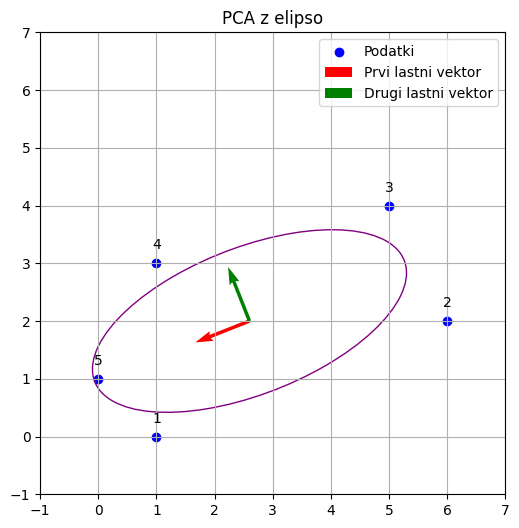

In [11]:
data = np.loadtxt("data/points.txt")
projected_data, mean, eigenvectors, eigenvalues = PCA(data)
cov_matrix_b = compute_covariance_matrix(center_data(data, mean))


plt.figure(figsize=(6, 6))
for i, txt in enumerate(range(1, 6)):
    plt.annotate(txt, (data[i, 0], data[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.scatter(data[:, 0], data[:, 1], label="Podatki", color='blue')
plt.quiver(mean[0], mean[1], eigenvectors[0, 0], eigenvectors[0, 1], color='red', scale=8, label="Prvi lastni vektor")
plt.quiver(mean[0], mean[1], eigenvectors[1, 0], eigenvectors[1, 1], color='green', scale=8, label="Drugi lastni vektor")
a6_utils.drawEllipse(mean, cov_matrix_b)
plt.legend()
plt.title("PCA z elipso")
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()
plt.show()

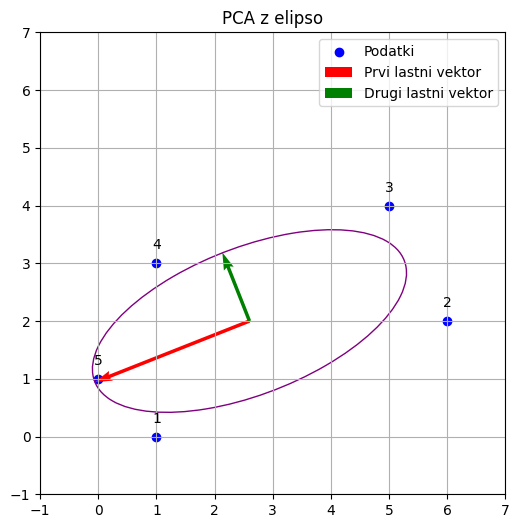

In [13]:
scaled_eigenvectors = eigenvectors * np.sqrt(eigenvalues)[:, np.newaxis]

plt.figure(figsize=(6, 6))
for i, txt in enumerate(range(1, 6)):
    plt.annotate(txt, (data[i, 0], data[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.scatter(data[:, 0], data[:, 1], label="Podatki", color='blue')
plt.quiver(mean[0], mean[1], scaled_eigenvectors[0, 0], scaled_eigenvectors[0, 1], color='red', scale=8, label="Prvi lastni vektor")
plt.quiver(mean[0], mean[1], scaled_eigenvectors[1, 0], scaled_eigenvectors[1, 1], color='green', scale=8, label="Drugi lastni vektor")
a6_utils.drawEllipse(mean, cov_matrix_b)
plt.legend()
plt.title("PCA z elipso")
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()
plt.show()

### What do you notice about the relationship between the eigenvectors and the data? What happens to the eigenvectors if you change the data or add more points?

The eigenvectors are the directions of the data that have the most variance. If we change the data or add more points, the eigenvectors will change. The eigenvectors will always be orthogonal to each other, but the directions of the eigenvectors will change.

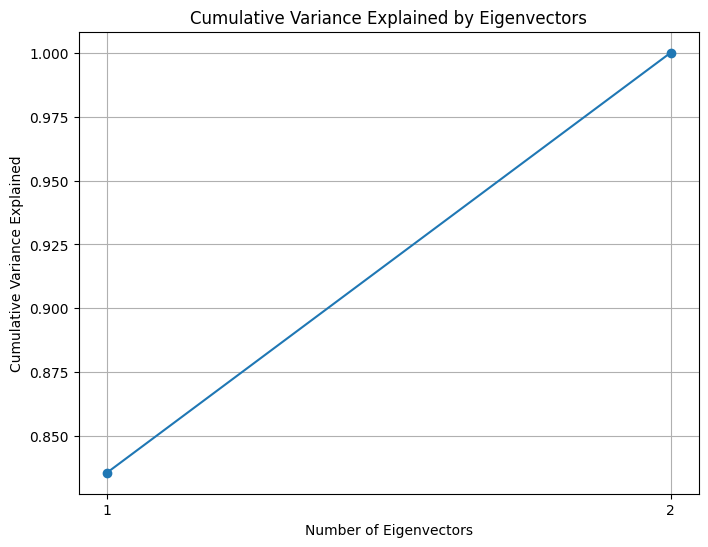

Percentage of variance explained by the first eigenvector: 83.57%


In [14]:
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Cumulative Variance Explained')
plt.xticks([1, 2])
plt.title('Cumulative Variance Explained by Eigenvectors')
plt.grid()
plt.show()

variance_explained_by_first = cumulative_variance[0] * 100
print(f"Percentage of variance explained by the first eigenvector: {variance_explained_by_first:.2f}%")

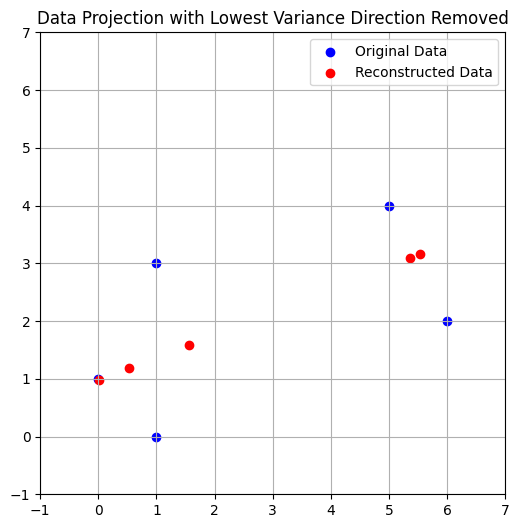

In [15]:
data_pca = project_to_pca_space(data, mean, eigenvectors)
data_pca[:, 1] = 0
reconstructed_data = reconstruct_from_pca_space(data_pca, mean, eigenvectors)

plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue')
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label="Reconstructed Data", color='red')
plt.legend()
plt.title("Data Projection with Lowest Variance Direction Removed")
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()
plt.show()

### What happens to the reconstructed points? Where is the data projected to?

The reconstructed points are projected to the eigenvectors. The data is projected to the eigenvectors.

Closest point to q_point in original space: [5. 4.]
Closest point to q_point in PCA space: [6. 2.]


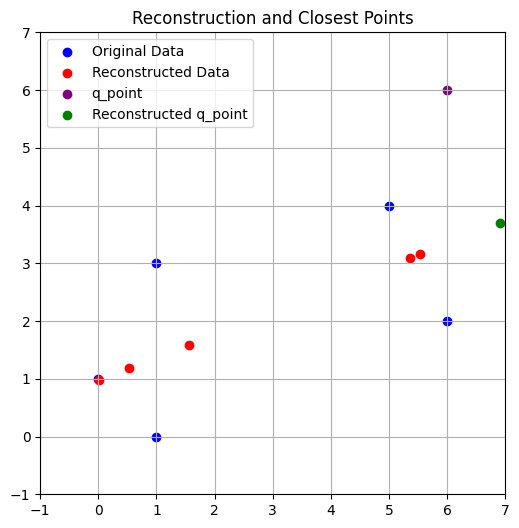

In [16]:
q_point = np.array([6, 6])

distances = np.linalg.norm(data - q_point, axis=1)
closest_point_index = np.argmin(distances)
closest_point = data[closest_point_index]
print(f"Closest point to q_point in original space: {closest_point}")

data_with_q = np.vstack([data, q_point])
projected_data_with_q = project_to_pca_space(data_with_q, mean, eigenvectors)

projected_data_with_q[:, 1] = 0
reconstructed_data_with_q = reconstruct_from_pca_space(projected_data_with_q, mean, eigenvectors)

reconstructed_q_point = reconstructed_data_with_q[-1]
reconstructed_distances = np.linalg.norm(reconstructed_data_with_q[:-1] - reconstructed_q_point, axis=1)
reconstructed_closest_point_index = np.argmin(reconstructed_distances)
reconstructed_closest_point = data[reconstructed_closest_point_index]
print(f"Closest point to q_point in PCA space: {reconstructed_closest_point}")

plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue')
plt.scatter(reconstructed_data_with_q[:-1, 0], reconstructed_data_with_q[:-1, 1], label="Reconstructed Data", color='red')
plt.scatter(q_point[0], q_point[1], label="q_point", color='purple')
plt.scatter(reconstructed_q_point[0], reconstructed_q_point[1], color='green', label="Reconstructed q_point")
plt.legend()
plt.title("Reconstruction and Closest Points")
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()
plt.show()

## Exercise 2: The dual PCA method

In [27]:
def dual_pca(data):
    mean = compute_mean(data)
    centered_data = center_data(data, mean)
    dual_cov_matrix = np.dot(centered_data.T, centered_data) / (len(data) - 1)
    eigenvectors, eigenvalues, _  = np.linalg.svd(dual_cov_matrix)
    U_original = np.dot(centered_data, eigenvectors) * np.sqrt(1 / (eigenvalues * (len(data) - 1)))

    U_original[:, 2:] = 0

    return project_to_pca_space(data, mean, U_original), mean, eigenvectors, eigenvalues, U_original

data = np.loadtxt("data/points.txt")
projected_data, mean, eigenvectors, eigenvalues, U = dual_pca(data)
projected_data1, mean1, eigenvectors1, eigenvalues1 = PCA(data)

print("PCA vs dual PCA:")
print("eigenvectors:")
print(eigenvectors1)
print(eigenvectors)
print("eigenvalues:")
print(eigenvalues1)
print(eigenvalues)
print("U:")
print(U)

PCA vs dual PCA:
eigenvectors:
[[-0.92992935 -0.36773822]
 [-0.36773822  0.92992935]]
[[-0.92992935 -0.36773822]
 [-0.36773822  0.92992935]]
eigenvalues:
[8.18975683 1.61024317]
[8.18975683 1.61024317]
U:
[[ 0.38845879 -0.50099451]
 [-0.55241234 -0.49265394]
 [-0.51843817  0.38507594]
 [ 0.19570873  0.59825298]
 [ 0.48668299  0.01031953]]


[[1. 0.]
 [6. 2.]
 [5. 4.]
 [1. 3.]
 [0. 1.]]
[[ 1.00000000e+00 -8.88178420e-16]
 [ 6.00000000e+00  2.00000000e+00]
 [ 5.00000000e+00  4.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00]
 [-2.22044605e-15  1.00000000e+00]]


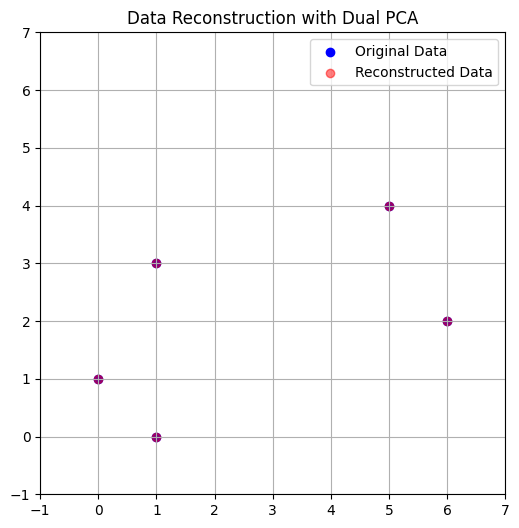

In [31]:
original_data = reconstruct_from_pca_space(projected_data, mean, U)
print(data)
print(original_data)

plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue')
plt.scatter(original_data[:, 0], original_data[:, 1], label="Reconstructed Data", color='red', alpha=0.5)
plt.legend()
plt.title("Data Reconstruction with Dual PCA")
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()
plt.show()